<a href="https://colab.research.google.com/github/geocarvalho/tutoriais/blob/main/ml/pycaret_first_impression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Um teste com AutoML usando PyCaret

* PyCaret é uma biblioteca aberta com baixo uso de código em Python. Ela permite que você prepare seus dados e desenvolva um modelo em poucos segundos.
* Para saber mais sobre o que é usado, vá em https://pycaret.org/


In [1]:
!pip install pycaret

     |████████████████████████████████| 256kB 6.7MB/s 
     |████████████████████████████████| 245kB 10.7MB/s 
     |████████████████████████████████| 14.2MB 313kB/s 
     |████████████████████████████████| 6.8MB 58.8MB/s 
     |████████████████████████████████| 102kB 12.3MB/s 
     |████████████████████████████████| 276kB 54.1MB/s 
     |████████████████████████████████| 174kB 64.2MB/s 
     |████████████████████████████████| 1.7MB 45.9MB/s 
     |████████████████████████████████| 157.5MB 80kB/s 
     |████████████████████████████████| 65.8MB 61kB/s 
     |████████████████████████████████| 1.8MB 42.3MB/s 
     |████████████████████████████████| 604kB 47.0MB/s 
     |████████████████████████████████| 3.1MB 39.7MB/s 
     |████████████████████████████████| 81kB 14.1MB/s 
     |████████████████████████████████| 61kB 10.8MB/s 
     |████████████████████████████████| 163kB 45.0MB/s 
     |████████████████████████████████| 1.1MB 45.5MB/s 
     |████████████████████████████████| 81kB 13.7MB/

In [34]:
from sklearn.model_selection import train_test_split
import pycaret.classification as pc
import pandas as pd

# Abrindo o dataset de exemplo.

* Vamos usar uns dados bem simples, só para testar a bibliotca.
* [Heart failure clinical records Data Set](https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records)

In [3]:
data_url = "https://raw.githubusercontent.com/lorenzodenisi/Heart-Failure-Clinical-Records/master/heart_failure_clinical_records_dataset.csv"
data_df = pd.read_csv(data_url)
data_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
data_df.shape

(299, 13)

In [5]:
# Checar por valores faltantes
data_df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
# Olhar todas as colunas, para saber qual indicaremos como classe de interesse
data_df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

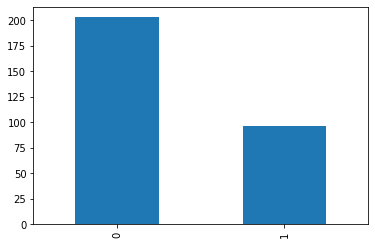

In [7]:
# Verificar se os dados estão desbalanceados
data_df["DEATH_EVENT"].value_counts().plot(kind="bar")

In [35]:
# Separar o banco em treino e teste
train, test = train_test_split(data_df, test_size=0.2, random_state=42)
print(train.shape)
print(test.shape)

(239, 13)
(60, 13)


# Usando PyCaret, finalmente.

* Importamos o `pycaret.classification` por ser um problema simple de classificação.

In [8]:
# Métodos e atributos disponíveis
dir(pc)

['Any',
 'Dict',
 'Display',
 'List',
 'MLUsecase',
 'Optional',
 'Tuple',
 'Union',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'add_metric',
 'automl',
 'blend_models',
 'calibrate_model',
 'compare_models',
 'create_model',
 'deploy_model',
 'enable_colab',
 'ensemble_model',
 'evaluate_model',
 'finalize_model',
 'get_config',
 'get_logs',
 'get_metrics',
 'interpret_model',
 'io',
 'is_in_colab',
 'load_config',
 'load_model',
 'models',
 'np',
 'optimize_threshold',
 'pd',
 'plot_model',
 'predict_model',
 'pull',
 'pycaret',
 'remove_metric',
 'save_config',
 'save_model',
 'set_config',
 'setup',
 'stack_models',
 'traceback',
 'tune_model',
 'warnings']

In [9]:
# Inicializar o ambiente
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [36]:
clf = pc.setup(data=train, target="DEATH_EVENT")

,Description,Value
0,session_id,4147
1,Target,DEATH_EVENT
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(239, 13)"
5,Missing Values,False
6,Numeric Features,6
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [37]:
# Para ignorar alguma coluna basta:
# pc.setup(data=data_df, target="DEATH_EVENT", ignore_features=["age", "diabetes"])

# Vamos comparar vários modelos e suas métricas de acurácia

* Semelhante a um relatório de classificação, AUC, F1-score.
* Para problemas de classificação:

> Relatório de classificação;

> AUC, Recall, Precision, F1-score, Kappa.

* Para problemas de regressão:

> MAE, MSE, RMSE, R2, RMSLE e MAPE.

In [38]:
# Comparando os modelos
model = pc.compare_models(sort="F1", turbo=False)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8680,0.8891,0.70,0.8538,0.7578,0.6702,0.6848,0.034
rf,Random Forest Classifier,0.8629,0.9049,0.68,0.8733,0.7530,0.6608,0.6778,0.462
xgboost,Extreme Gradient Boosting,0.8438,0.8892,0.70,0.8071,0.7379,0.6282,0.6408,0.166
gbc,Gradient Boosting Classifier,0.8507,0.9211,0.70,0.8171,0.7366,0.6355,0.6512,0.080
catboost,CatBoost Classifier,0.8570,0.9118,0.68,0.8550,0.7335,0.6418,0.6607,0.850
ada,Ada Boost Classifier,0.8504,0.8592,0.66,0.8695,0.7081,0.6179,0.6501,0.094
lr,Logistic Regression,0.8324,0.8598,0.64,0.7838,0.6903,0.5804,0.5946,0.269
dt,Decision Tree Classifier,0.7912,0.7589,0.68,0.6405,0.6545,0.5056,0.5108,0.017
lda,Linear Discriminant Analysis,0.8033,0.8812,0.58,0.7217,0.6207,0.4941,0.5139,0.018
et,Extra Trees Classifier,0.8272,0.8984,0.54,0.7917,0.6180,0.5233,0.5468,0.440


In [39]:
# Comparar modelos mas ignorar algum específico
pc.compare_models(exclude=["svm"])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8680,0.8891,0.70,0.8538,0.7578,0.6702,0.6848,0.030
rf,Random Forest Classifier,0.8629,0.9049,0.68,0.8733,0.7530,0.6608,0.6778,0.461
catboost,CatBoost Classifier,0.8570,0.9118,0.68,0.8550,0.7335,0.6418,0.6607,0.845
gbc,Gradient Boosting Classifier,0.8507,0.9211,0.70,0.8171,0.7366,0.6355,0.6512,0.079
ada,Ada Boost Classifier,0.8504,0.8592,0.66,0.8695,0.7081,0.6179,0.6501,0.092
xgboost,Extreme Gradient Boosting,0.8438,0.8892,0.70,0.8071,0.7379,0.6282,0.6408,1.687
lr,Logistic Regression,0.8324,0.8598,0.64,0.7838,0.6903,0.5804,0.5946,0.037
et,Extra Trees Classifier,0.8272,0.8984,0.54,0.7917,0.6180,0.5233,0.5468,0.453
ridge,Ridge Classifier,0.8033,0.0000,0.58,0.6967,0.6124,0.4891,0.5040,0.016
lda,Linear Discriminant Analysis,0.8033,0.8812,0.58,0.7217,0.6207,0.4941,0.5139,0.017


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=4147, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [40]:
# Para saber como se escreve a abreviação
! pip install neatutils
import neatutils

In [41]:
neatutils.get_abbrev("Quadratic Discriminant Analysis")

'qda'

# Criar um modelo

* Selecionar o melhor, visto na comparação.
* Fazer validação cruzada com k-fold de 10.

In [42]:
# Escolhemos o melhor baseado em f1-score e kappa
xgboost_model = pc.create_model("xgboost")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9412,0.9167,0.8000,1.0000,0.8889,0.8496,0.8593
1,0.9412,0.9833,0.8000,1.0000,0.8889,0.8496,0.8593
2,0.7059,0.6667,0.6000,0.5000,0.5455,0.3307,0.3337
3,0.7647,0.8500,0.8000,0.5714,0.6667,0.4925,0.5092
4,0.8824,0.9667,0.8000,0.8000,0.8000,0.7167,0.7167
5,0.8824,0.8667,0.8000,0.8000,0.8000,0.7167,0.7167
6,0.8824,0.9333,0.6000,1.0000,0.7500,0.6792,0.7171
7,0.6250,0.8000,0.4000,0.4000,0.4000,0.1273,0.1273
8,0.8750,0.9091,0.6000,1.0000,0.7500,0.6735,0.7125
9,0.9375,1.0000,0.8000,1.0000,0.8889,0.8462,0.8563


In [43]:
best_model = pc.create_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9412,0.9333,0.8000,1.0000,0.8889,0.8496,0.8593
1,0.9412,0.9667,0.8000,1.0000,0.8889,0.8496,0.8593
2,0.7059,0.6667,0.4000,0.5000,0.4444,0.2478,0.2506
3,0.7647,0.8667,0.8000,0.5714,0.6667,0.4925,0.5092
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.8824,0.8167,0.8000,0.8000,0.8000,0.7167,0.7167
6,0.8824,0.9500,0.6000,1.0000,0.7500,0.6792,0.7171
7,0.7500,0.8182,0.4000,0.6667,0.5000,0.3469,0.3671
8,0.8750,0.8727,0.6000,1.0000,0.7500,0.6735,0.7125
9,0.9375,1.0000,0.8000,1.0000,0.8889,0.8462,0.8563


In [52]:
# Como tunar o modelo
tuned_model = pc.tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9412,0.9833,0.8000,1.0000,0.8889,0.8496,0.8593
1,0.8824,1.0000,0.6000,1.0000,0.7500,0.6792,0.7171
2,0.6471,0.6917,0.4000,0.4000,0.4000,0.1500,0.1500
3,0.8235,0.9167,0.8000,0.6667,0.7273,0.5984,0.6039
4,0.8824,0.9417,0.8000,0.8000,0.8000,0.7167,0.7167
5,0.8824,0.8333,0.8000,0.8000,0.8000,0.7167,0.7167
6,0.7647,0.9167,0.2000,1.0000,0.3333,0.2609,0.3873
7,0.8125,0.9273,0.6000,0.7500,0.6667,0.5385,0.5449
8,0.9375,0.8364,0.8000,1.0000,0.8889,0.8462,0.8563
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [53]:
# Mostrar os parametros usados
print(tuned_model)

LGBMClassifier(bagging_fraction=0.6, bagging_freq=5, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
               importance_type='split', learning_rate=0.493, max_depth=-1,
               min_child_samples=5, min_child_weight=0.001, min_split_gain=0.5,
               n_estimators=190, n_jobs=-1, num_leaves=10, objective=None,
               random_state=4147, reg_alpha=1, reg_lambda=0.7, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [54]:
# Otimizar o modelo de acordo com uma métrica
tuned_model_opt = pc.tune_model(best_model, optimize="F1", n_iter=25)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9412,1.0000,0.8000,1.0000,0.8889,0.8496,0.8593
1,0.8824,0.9833,0.8000,0.8000,0.8000,0.7167,0.7167
2,0.7059,0.6833,0.4000,0.5000,0.4444,0.2478,0.2506
3,0.7647,0.8500,0.8000,0.5714,0.6667,0.4925,0.5092
4,0.8824,0.9833,0.8000,0.8000,0.8000,0.7167,0.7167
5,0.8824,0.9167,0.6000,1.0000,0.7500,0.6792,0.7171
6,0.8824,0.9667,0.6000,1.0000,0.7500,0.6792,0.7171
7,0.8125,0.8545,0.6000,0.7500,0.6667,0.5385,0.5449
8,0.8125,0.7818,0.6000,0.7500,0.6667,0.5385,0.5449
9,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [55]:
# Avaliando o modelo
pc.evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

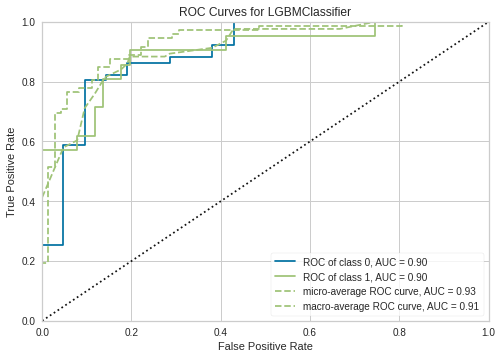

In [56]:
# Plotar o desempenho do modelo
pc.plot_model(tuned_model)

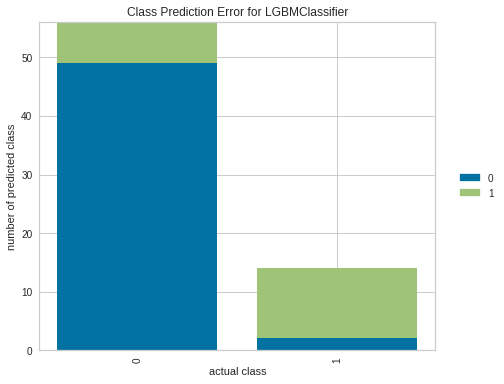

In [57]:
# Plotar o erro predito
pc.plot_model(tuned_model, plot="error")

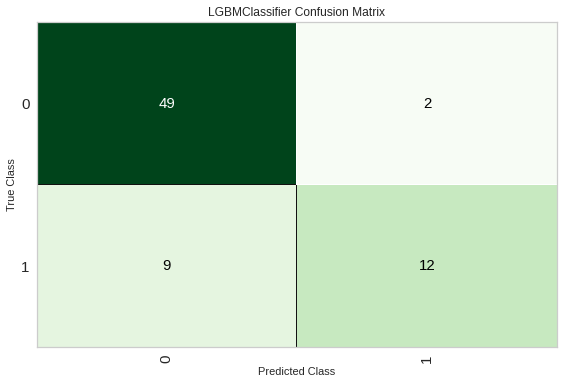

In [58]:
# Plotar a matrix de confusão
pc.plot_model(tuned_model, plot="confusion_matrix")

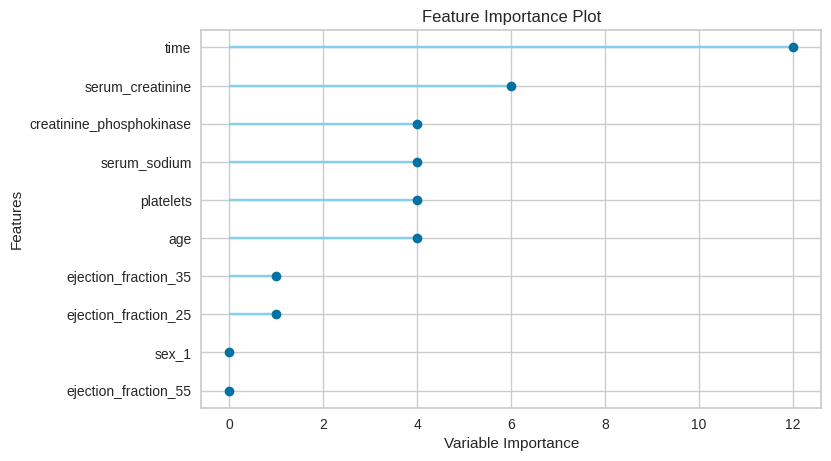

In [59]:
# Plotar as features mais importantes
pc.plot_model(tuned_model, plot="feature")

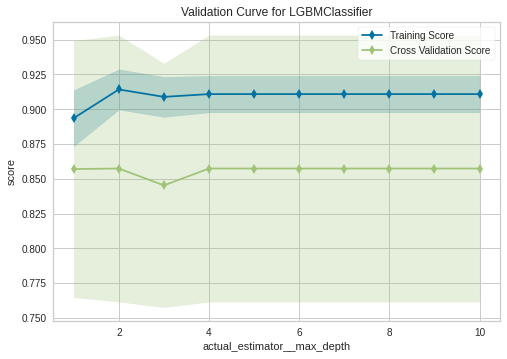

In [60]:
# Plotar a curva de validação
pc.plot_model(tuned_model, plot="vc")

In [61]:
# Otimizar o treshold para o modelo
opt_prob = pc.optimize_threshold(tuned_model, true_negative=1500, false_negative=5000)

Optimized Probability Threshold: 0.9999 | Optimized Cost Function: 181500


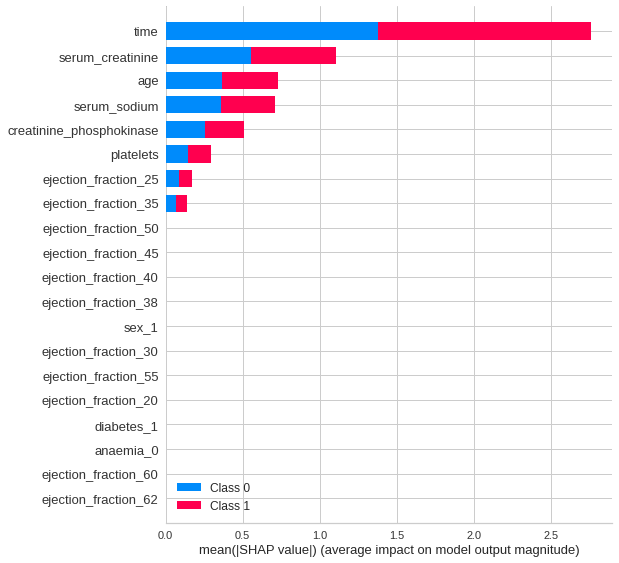

In [64]:
# Interpretando o modelo
!pip install shap
pc.interpret_model(tuned_model)

In [66]:
# Finalizando o modelo para predição
final_model = pc.finalize_model(tuned_model)

In [70]:
# Salvando o modelo em pickle
pc.save_model(final_model, "rf_saved_model_02152021")

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='DEATH_EVENT', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_...
                                 boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, feature_fraction=0.4,
                                 importance_type='split', learning_rate=0.493,
                                 max_depth=-

In [71]:
# Abrindo o modelo salvo novamente
loaded_rf = pc.load_model("rf_saved_model_02152021")

Transformation Pipeline and Model Successfully Loaded


In [75]:
# Fazendo predição com o modelo finalizado
prediction = pc.predict_model(loaded_rf, data=test)
print(prediction.head())

      age  anaemia  creatinine_phosphokinase  ...  DEATH_EVENT  Label   Score
281  70.0        0                       582  ...            0      1  0.6145
265  50.0        1                       298  ...            0      0  0.9765
164  45.0        0                      2442  ...            1      0  0.8707
9    80.0        1                       123  ...            1      1  0.9614
77   42.0        0                       102  ...            0      0  0.9636

[5 rows x 15 columns]


# Referências

* [Machine Learning with PyCaret and Python](https://www.youtube.com/watch?v=cnxOGWtwdv8&feature=emb_title)
* [Pycaret documentation](https://pycaret.org/)
* [Talks # 7: Moez Ali: Machine learning with PyCaret](https://www.youtube.com/watch?v=jlW5kRBwcb0)